# Groupon Exercise: Technical Appendix

In [712]:
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
%matplotlib inline

### Import and sort data by deal start date

In [713]:
billings_data=pd.read_csv('Q4_2013_Groupon_North_America_Data_XLSX.csv', index_col=0)
billings_data.drop(['Unnamed: 7'],axis=1,inplace=True)
billings_data['Start Date']=pd.to_datetime(billings_data['Start Date'])


In [714]:
billings_data.sort_values(by='Start Date',inplace=True)
billings_data

,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
Deal ID,,,,,,
gr-millevois-tire-service-center,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-millevois-tire...,Local,Third - Party
gr-manakeesh-cafe-bakery,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local,Third - Party
gr-phoenix-salon-and-spa,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-phoenix-salon-...,Local,Third - Party
gr-hands-in-motion,0.000,0.00000,2011-11-21,http://www.groupon.com/deals/gr-hands-in-motion,Local,Third - Party
dc-fd2-bartending-college-allentown-reading,86.800,4253.20000,2012-06-06,http://www.groupon.com/deals/dc-fd2-bartending...,Local,Third - Party
sambuca-houston,76.300,763.00000,2012-06-26,http://www.groupon.com/deals/sambuca-houston,Local,Third - Party
sambuca-restaurant,414.200,8556.50000,2012-06-26,http://www.groupon.com/deals/sambuca-restaurant,Local,Third - Party
rondis-self-fitness-1,0.000,0.00000,2012-07-01,http://www.groupon.com/deals/rondis-self-fitne...,Local,Third - Party
thai-cuisine-2,0.000,0.00000,2012-07-07,http://www.groupon.com/deals/thai-cuisine-2,Local,Third - Party


### Create time series showing sum of local deals launched each day and add the missing days to the timeseries

In [721]:
#Plot launched deals over start dates
billing_timeser=billings_data[billings_data['Segment']=='Local'].groupby('Start Date').sum()['Billings']
billing_timeser

Start Date
2011-11-21    0.000000e+00
2012-06-06    4.253200e+03
2012-06-26    9.319500e+03
2012-07-01    0.000000e+00
2012-07-07    0.000000e+00
2012-07-21    2.616000e+02
2012-07-29    4.698000e+02
2012-07-31    1.580500e+03
2012-08-01    3.900500e+02
2012-08-04    2.432900e+03
2012-08-08    0.000000e+00
2012-08-12    3.920000e+02
2012-08-14    3.924000e+02
2012-08-15    0.000000e+00
2012-08-16    0.000000e+00
2012-08-18    0.000000e+00
2012-08-19    1.200090e+04
2012-08-20   -1.674450e+03
2012-08-21    1.003010e+04
2012-08-22    8.801000e+02
2012-08-23    3.706000e+03
2012-08-24    8.502000e+02
2012-08-25    1.639000e+03
2012-08-26    2.244750e+03
2012-08-27    0.000000e+00
2012-08-28    3.116400e+03
2012-08-29    8.273100e+03
2012-08-30    3.135100e+03
2012-09-01    3.778150e+03
2012-09-02    4.218300e+03
                  ...     
2013-12-02    5.586021e+06
2013-12-03    2.354402e+06
2013-12-04    3.305739e+06
2013-12-05    3.972414e+06
2013-12-06    2.991788e+06
2013-12-07    1.7

In [722]:
missing_days= pd.date_range(start='2013-10-20', end='2013-10-30')
ser = pd.Series(np.nan, index=missing_days) 

billing_timeser=billing_timeser.append(ser, ignore_index=False) 
   


### Treat missing data by smoothing out noise and interpolating the trendline through the missing section

In [724]:
from scipy.signal import savgol_filter

billing_timeser.sort_index(inplace=True)
before=billing_timeser[billing_timeser.index<'2013-10-20']
after=billing_timeser[billing_timeser.index>'2013-10-30']
bhat = savgol_filter(before, 53, 1)
ahat = savgol_filter(after, 53, 3)

local_before=pd.Series(bhat, index=before.index)
local_after=pd.Series(ahat, index=after.index)
local_trend=local_before.append(local_after, ignore_index=False) 
local_trend=local_trend.append(ser, ignore_index=False) 
local_trend.sort_index(inplace=True)

for_estim=local_trend.interpolate(method='polynomial', order=2)
estim_line=for_estim.loc['2013-10-20':'2013-10-30']
estim_line

2013-10-20    3.440191e+06
2013-10-21    3.482006e+06
2013-10-22    3.517561e+06
2013-10-23    3.546856e+06
2013-10-24    3.569889e+06
2013-10-25    3.586663e+06
2013-10-26    3.597854e+06
2013-10-27    3.604140e+06
2013-10-28    3.605522e+06
2013-10-29    3.602000e+06
2013-10-30    3.593574e+06
dtype: float64

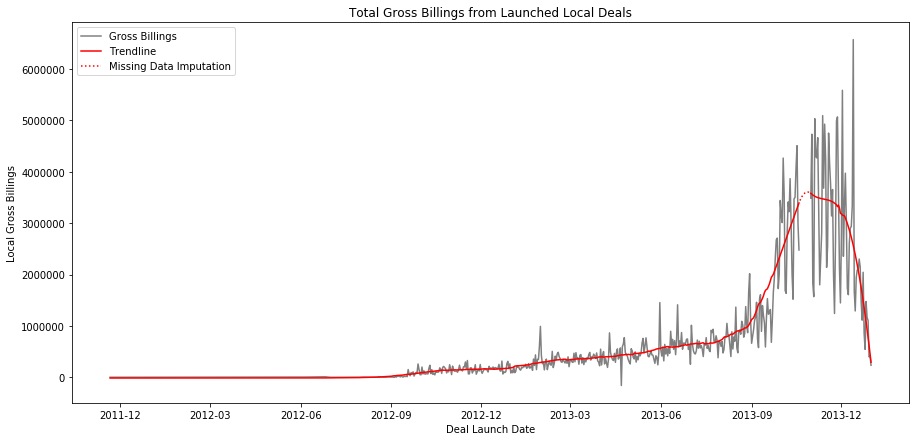

In [725]:

plt.subplots(figsize=(15, 7))
plt.plot(billing_timeser.index, billing_timeser.values,'gray', label='Gross Billings')


plt.plot(local_trend.index, local_trend,'r',label='Trendline')
plt.plot(estim_line.index, estim_line,linestyle='dotted',color='red',label='Missing Data Imputation')

plt.title('Total Gross Billings from Launched Local Deals')
plt.ylabel('Local Gross Billings')
plt.xlabel('Deal Launch Date')
plt.legend(loc='best')




### Scale the billings from deals that launched before 2013 Q4  

In [732]:
billing_timeser=billings_data[billings_data['Segment']=='Local'].groupby('Start Date').sum()['Billings']
#Need to adjust billings from deals before Q4. Assume a deal produced the same amount of billings each day after launch, with 
# with the exception of the holiday seasons which will be given a higher weight. The holiday season is assumed to be 
# from Mid-November till the end December since this roughly corresponds to Christmas and Thanksgiving
deal_end=dt.date(2013, 12, 30) #Assume all deals which started before Q4 stayed active until the end of the
#holiday season, i.e. end of the year
shop_seas1_beg=dt.date(2012,11,10)
shop_seas1_end=dt.date(2012,12,31)
shop_seas2_beg=dt.date(2013,11,10) 
shop_seas2_end=dt.date(2013,12,31)#Start of holiday shopping season
shop_season_weight=1.35 #how much more we'll be weighing shopping season days versus normal days
first_q_day=dt.date(2013, 10, 1)#Start of the fourth quarter
off_in_q4=(shop_seas2_beg-first_q_day).days #part of q4 that's not in the shopping season
active_q4=(deal_end-first_q_day).days #Number of days these deals stayed active in Q4

adjust_local=billing_timeser[billing_timeser.index<'2013-10-01']
new_adjust=adjust_local
adjust_local.index=adjust_local.index.date

for day in range(len(adjust_local)):
        if  adjust_local.index[day] < shop_seas1_beg:
            before_seas1=(shop_seas1_beg-adjust_local.index[day]).days
            shop_season=(shop_seas1_end-shop_seas1_beg).days*shop_season_weight
            between_seasons=(shop_seas2_beg-shop_seas1_end).days
            adjust_local[day]=adjust_local[day]/(before_seas1+shop_season*2+between_seasons) *(shop_season+off_in_q4)
        elif adjust_local.index[day] < shop_seas1_end:
            during_seas1=(shop_seas1_end-adjust_local.index[day]).days * shop_season_weight 
            shop_season=(shop_seas2_end-shop_seas2_beg).days*shop_season_weight
            between_seasons=(shop_seas2_beg-shop_seas1_end).days
            adjust_local[day]=adjust_local[day]/(during_seas1+shop_season+between_seasons) *(shop_season+off_in_q4)
        else:
            shop_season=(shop_seas2_end-shop_seas2_beg).days*shop_season_weight
            off_season=(shop_seas2_beg-adjust_local.index[day]).days
            adjust_local[day]=adjust_local[day]/(shop_season + off_season) * (shop_season+off_in_q4)
# for day in range(len(adjust_local)):
#         total_active=(deal_end - adjust_local.index[day]).days
#         adjust_local[day]=adjust_local[day]/total_active*active_q4
    
    


In [727]:
billing_timeser[billing_timeser.index<'2013-10-01']=adjust_local

### Calculate total billings by segment after all adjustments

In [731]:
goods_sum=billings_data.groupby('Segment').sum().loc['Goods','Billings']
travel_sum=billings_data.groupby('Segment').sum().loc['Travel','Billings']
local_sum=billing_timeser.sum()+sum(estim_line) #add up adjusted timeseries and sum of imputted values
total_billings=goods_sum + travel_sum + local_sum
total_billings
#billings_data.groupby('Segment').sum()

725759408.34535098

In [729]:
print("Groupon's estimated total billings from goods : {} \nGroupon's estimated total billings from \
travel : {} \nGroupon's estimated total billings from local deals : {} ".format(goods_sum,travel_sum,local_sum))

Groupon's estimated total billings from goods : 282245671.0408414 
Groupon's estimated total billings from travel : 70552062.1244999 
Groupon's estimated total billings from local deals : 372961675.1800096 


In [730]:
print("Groupon's estimated total billings : {}  ".format(total_billings))

Groupon's estimated total billings : 725759408.345351  


### Plot time series showing sum of billings for goods launched each day

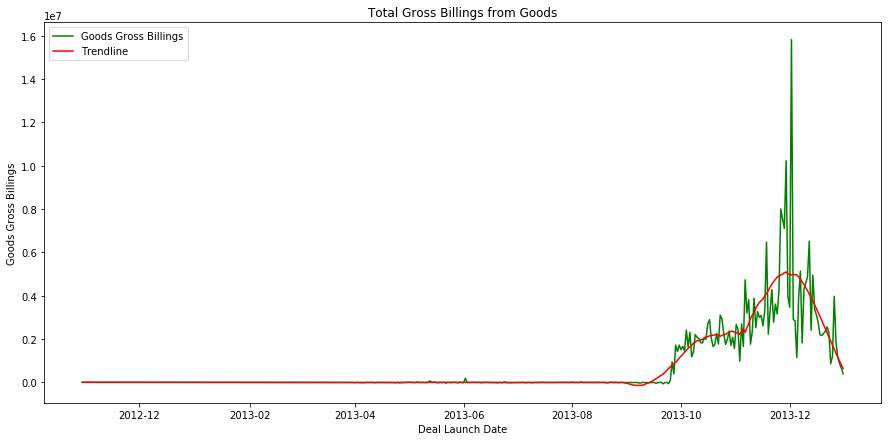

In [711]:
plt.subplots(figsize=(15, 7))
goods_timeser=billings_data[billings_data['Segment']=='Goods'].groupby('Start Date').sum()['Billings']
plt.plot(goods_timeser.index, goods_timeser.values,'g', label='Goods Gross Billings')
plt.title('Total Gross Billings from Goods')
plt.ylabel('Goods Gross Billings')
plt.xlabel('Deal Launch Date')

bhat = savgol_filter(goods_timeser, 53, 3)
plt.plot(goods_timeser.index, bhat,'r', label='Trendline')
plt.legend(loc='best')




### Plot time series showing sum of billings for travel deals launched each day

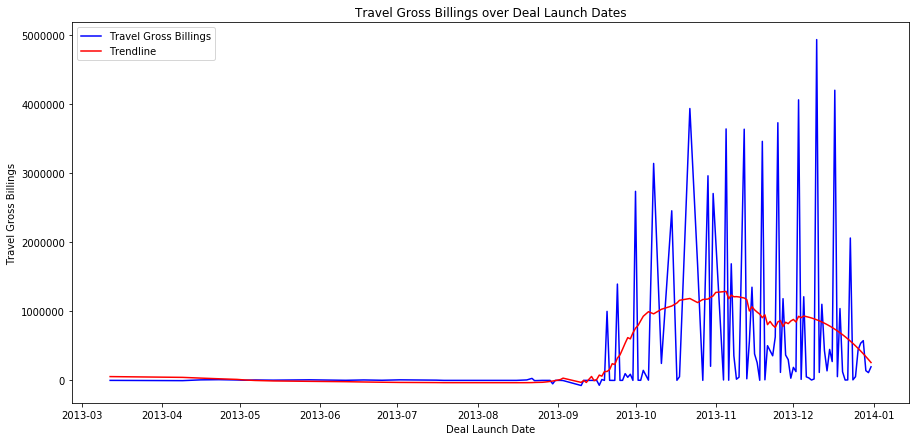

In [684]:
plt.subplots(figsize=(15, 7))
travel_timeser=billings_data[billings_data['Segment']=='Travel'].groupby('Start Date').sum()['Billings']
plt.plot(travel_timeser.index, travel_timeser.values,'b', label='Travel Gross Billings')
plt.title('Travel Gross Billings over Deal Launch Dates')
plt.ylabel('Travel Gross Billings')
plt.xlabel('Deal Launch Date')

bhat = savgol_filter(travel_timeser, 53, 2)
plt.plot(travel_timeser.index, bhat,'r', label='Trendline')
plt.legend(loc='best')
plt.legend(loc='best')
